# <center><font face="arial" size="5" color=#0101DF>NUMERIQUE ET SCIENCES INFORMATIQUES Terminale NSI</font></center>

## <font color=#013ADF>Révisions</font>

Les exercices ne sont pas classés par ordre de difficultés.

### 1- Les tours de Hanoï

<div class="alert alert-success">

<img src="Images/Hanoi.png" alt="Les tours de Hanoï" width=50% align=center>  
    
</div>

<div class="alert alert-success">

    
Le but du jeu est de déplacer entièrement la pile initiale sur la dernière tige.

– Le joueur ne doit bouger qu’un disque à la fois ;
    
– Seul un petit disque peut être placé sur un plus gros disque ;
    
https://www.youtube.com/watch?v=w_9P7icYh7Y
    
Différentes approches ou point de vue :

https://www.youtube.com/watch?v=rOnRbPKvGQg
    
https://twitter.com/ikeikey/status/1333335232292872194
    
Une explication détaillée sur Wikipédia (observer en particulier le graphe des tours pour passer de AAA à CCC)

https://fr.wikipedia.org/wiki/Tours_de_Hano%C3%AF
</div>

<div class="alert alert-warning">
<img src="Images/CR.png" alt="logo CR" width=5% align=right>

Travail à faire

- Réaliser une fonction récursive implémentant les règles du jeu.

</div>

<div class="alert alert-success">

<img src="Images/hanoi.gif" alt="Les tours de Hanoï" width=50% align=center>  
    
</div>

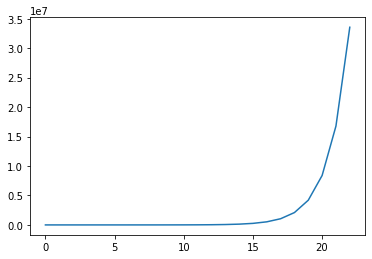

In [23]:
import matplotlib.pyplot as plt
coup=0
#liste=[TdH(n,'A','B','C') for n in range(2,25)]
plt.plot(liste)
plt.show()
plt.close()

In [18]:
coup=0
def TdH(n , A, B, C):
    """
    Fonction implémenant les règles du jeu des Tours de Hanoi
    """
    global coup #comptage du nb de coup; variable globale pour éviter la remise à 0 à chaque appel récursif
    coup+=1
    if n==1: #si il n'y a qu'un seul disque
        #print("Disque 1 de",A,"jusqu'à",B)
        return 
    TdH(n-1, A, C, B) #appel récursif
    #print("Disque",n,"de",A,"jusqu'à",B)
    TdH(n-1, C, B, A) #appel récursif
    return coup #nb de coup
          
TdH(3,'A','B','C')

7

### 2- Réaliser une file avec deux piles

<div class="alert alert-success">
Le principe est simple :

- Lorsqu'on veut enfiler un élément dans la file abstraite, on dépose en réalité l'élément dans une structure de données pile qu'on nommera pile_entree.
- Lorsqu'on veut défiler un élément de la file abstraite, on va chercher en réalité le sommet d'une structure de données pile qu'on nommera pile_sortie.

<img src="Images/file2piles.png" alt="Une file avec 2 piles" width=50% align=center>  

Comment faire ?
    
Lorsqu'on veut défiler les données de la file, deux cas se présentent :

- Si la pile de sortie est vide, on dépile l'intégralité de la pile d'entree dans la pile de sortie : cela va permettre d'inverser les positions respectives du premier arrivé et du dernier arrivé de la pile d'entree.
- Si la pile de sortie n'est pas vide, on dépile juste la pile de sortie.
</div>

<div class="alert alert-warning">
<img src="Images/CR.png" alt="logo CR" width=5% align=right>

Travail à faire

- Réaliser la structure implémentant cette file abstraite selon le paradigme fonctionnel et/ou orienté objet ;
- Placer des vérifications sur les pré et postconditions (assertion), ainsi que des tests unitaires (doctest);

</div>

In [4]:
from strucline import Pile
class File_abstraite():
    def __init__(self):
        self.pile_entree=Pile()
        self.pile_sortie=Pile()
        
    def est_vide(self):
        return self.pile_entree.est_vide() and self.pile_sortie.est_vide()
    
    def enfiler(self, val):
        self.pile_entree.empiler(val)
        
    def defiler(self):
        if self.pile_sortie.est_vide():
            transvaser(self)
        else:
            self.pile_sortie.depiler()
    
    def __repr__(self):
        if self.est_vide():
            return "None"
        return f"Pile d'entrée : {self.pile_entree.pile}\nPile de sortie : {self.pile_sortie.pile}"
    
                
def transvaser(file_tr):
    while not(file_tr.pile_entree.est_vide()):
        file_tr.pile_sortie.empiler(file_tr.pile_entree.depiler())
        
        
        
if __name__=='__main__':
    file1=File_abstraite()
    print(file1.est_vide())
    file1.enfiler(45)
    file1.enfiler(4)
    file1.enfiler(455)
    print(file1, "\n")
    file1.defiler()
    print(file1)

True
Pile d'entrée : [45, 4, 455]
Pile de sortie : [] 

Pile d'entrée : []
Pile de sortie : [455, 4, 45]


### 3- Calculatrice polonaise inverse

<div class="alert alert-success">
Dans l'écriture usuelle des expressions algébriques, les parenthèses sont indispensables. Elles permettent par exemple de distinguer les expressions 1 + 2 x 3 et (1 + 2) x 3.

Avec la notation préfixée (appelée aussi notation polonaise inverse, en référence à un mathématicien polonais, Jan Lukasiewic), les parenthèses ne sont plus nécessaires, ni aucune règle de priorité.

Ainsi l'expression polonaise inverse décrite par la chaîne de caractères : '1 2 3 * + 4 *' désigne l'expression usuellement notée (1 + 2 x 3) x 4

Pour évaluer cette expression, on observe un à un les éléments de l'expression et on effectue les actions suivantes :

- si l'élément est un nombre, on le stocke dans une structure de donnée linéaire à définir.
- Si l'élément est un opérateur, on récupère les deux nombres dernièrement stockés, on leur applique l'opérateur, et on restocke le résultat.

</div>

<div class="alert alert-warning">
<img src="Images/CR.png" alt="logo CR" width=5% align=right>

Travail à faire

- Écrire une telle fonction d'évaluation prenant en paramètre une liste d'entiers et d'opérateurs représentant une expression en notation polonaise inverse et renvoyant la valeur de cette expression. Si l'expression est mal écrite, on renverra une erreur.
- Placer des vérifications sur les pré et postconditions (assertion), ainsi que des tests unitaires (doctest);

</div>


In [5]:
from strucline import Pile
import doctest
class Calcul_pol():
    """
    >>> K = Calcul_pol()
    >>> K.empiler(5)
    >>> K.empiler(8)
    >>> K.empiler("+")
    >>> K.calcul()
    13
    """
    def __init__(self):
        self.pile_nb = Pile()
        
    def empiler(self, val):
        if val=="+" or val=="-" or val=="*" or val=="/":
            self.pile_nb.empiler(val)
            self.calcul()
            return ""
        self.pile_nb.empiler(val)
        
    def calcul(self):
        if len(self.pile_nb.pile)<=2:
            return self.pile_nb.pile
        k=self.pile_nb.depiler()
        result=eval(f'{self.pile_nb.depiler()} {k} {self.pile_nb.depiler()}')
        self.empiler(result)
        return result          


if __name__=='__main__':
    kalkul=Calcul_pol()
    kalkul.empiler(12)
    kalkul.empiler(45)
    kalkul.empiler(98)
    kalkul.empiler("+")
    kalkul.empiler("*")
    kalkul.empiler(98)
    kalkul.empiler("-")
    kalkul.empiler(12)
    kalkul.empiler("+")
    kalkul.empiler(45)
    kalkul.empiler("*")
    print(kalkul.calcul())

[-72270]


In [7]:
help(eval)

Help on built-in function eval in module builtins:

eval(source, globals=None, locals=None, /)
    Evaluate the given source in the context of globals and locals.
    
    The source may be a string representing a Python expression
    or a code object as returned by compile().
    The globals must be a dictionary and locals can be any mapping,
    defaulting to the current globals and locals.
    If only globals is given, locals defaults to it.



In [10]:
from strucline import Pile
def evalu(exp:list)->float:
    pile=Pile()
    for elt in exp:
        if isinstance(elt, int):
            pile.empiler(elt)
        else:
            n1=pile.depiler()
            n2=pile.depiler()
            pile.empiler(eval(str(n1) + elt + str(n2)))
    solu = float(pile.depiler())
    assert pile.est_vide()
    return solu

if __name__ == '__main__':
    r1=evalu([6,3,4,2,10,'/','-','*','+'])
    print(r1)
    r2=evalu([1,2,3,'*','+',4,'*'])
    print(r2)

9.0
28.0


### 4- Chaînes bien parenthésées

<div class="alert alert-success">

On considère une chaîne de caractères incluant des parenthèses de toutes formes. La chaîne est dite bien parenthésée, si chaque paranthése ouvrante est associée à une parenthése fermante de même forme.
</div>

<div class="alert alert-warning">
<img src="Images/CR.png" alt="logo CR" width=10% align=right>

Travail à faire

- Écrire une fonction prenant en paramètre une chaîne de caractères contenant, entre autres, des parenthéses et qui renvoie True si la chaîne est bien parenthésée et False sinon.
</div>

In [16]:
from strucline import Pile
def parenthesage(expression):
    P=Pile()  
    for e in expression: 
        if e=='(' or e=='{' or e=='[': 
            P.empiler(e)  
        if e==')' or e=='}' or e==']':
            if P.est_vide() :  
                return False
            else:
                #print(len(P.pile))
                if len(P.pile)>=1:
                    if P.pile[-1]=='(' and e==')':
                        P.depiler()
                    elif P.pile[-1]=='{' and e=='}':
                        P.depiler()
                    elif P.pile[-1]=='[' and e==']':
                        P.depiler()
                #else:
                    #print(P.pile)
    if P.est_vide():
        return True
        return False
print(parenthesage("(6*4)(4+5)[[()]{}]"))

True


In [8]:
from strucline import Pile
def parenthesage(exp):
    P=Pile()
    dico={'(':')', '[':']', '{':'}'}
    for elt in exp:
        if elt in dico.keys():
            P.empiler(elt)
        elif elt in dico.values():
            vals,keys=list(dico.values()),list(dico.keys())
            if not(P.depiler()==keys[vals.index(elt)]):
                return False
    return P.est_vide()

print(parenthesage("(6*4)(4+5)[6[9872(982)58]{}]"))
                

True


In [31]:
help(dict)

Help on class dict in module builtins:

class dict(object)
 |  dict() -> new empty dictionary
 |  dict(mapping) -> new dictionary initialized from a mapping object's
 |      (key, value) pairs
 |  dict(iterable) -> new dictionary initialized as if via:
 |      d = {}
 |      for k, v in iterable:
 |          d[k] = v
 |  dict(**kwargs) -> new dictionary initialized with the name=value pairs
 |      in the keyword argument list.  For example:  dict(one=1, two=2)
 |  
 |  Methods defined here:
 |  
 |  __contains__(self, key, /)
 |      True if D has a key k, else False.
 |  
 |  __delitem__(self, key, /)
 |      Delete self[key].
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(...)
 |      x.__getitem__(y) <==> x[y]
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __init__(self, /, *args, **kwargs)
 |

### 5- Le problème de Josèphe. 

<div class="alert alert-success">
    
https://fr.wikipedia.org/wiki/Problème_de_Josèphe
    
On place en cercle les joueurs. On décide d'un joueur point de départ et on élimine ce joueur. Puis on compte 3 joueurs et on élimine le 3ème. On compte ensuite 3 joueurs en partant du suivant et on élimine...etc. Le problème est de prévoir le gagnant.

<img src="Images/Josephe.png" alt="Le problème de Josèphe" width=80% align=center>  


</div>

<div class="alert alert-warning">
<img src="Images/CR.png" alt="logo CR" width=5% align=right>

Travail à faire

- Écrire une fonction utilisant une file, prenant en paramètres la liste des joueurs et le module (dans l'exemple, le module est 3) et qui renvoie le gagnant ;
- Placer des vérifications sur les pré et postconditions (assertion), ainsi que des tests unitaires (doctest);
</div>

In [19]:
joueurs=["Lucas", "Vincent", "Tim", "Mathias"]
def josephe(joueurs, k):
    joueurs.pop(0)
    decal = k - 1
    index = decal % len(joueurs)
    while len(joueurs) > 1:
        joueurs.pop(index)
        index = (index + decal) % len(joueurs) 
    return joueurs[0]
print("le gagnant est :",josephe(joueurs, 3))

le gagnant est : Tim


In [14]:
from strucline import File
def jos(lpersonne, mod):
    f=File()
    for personne in lpersonne:
        f.enfiler(personne)
    f.defiler()
    while not(f.est_vide()):
        for i in range(mod-1):
            f.enfiler(f.defiler())
        p=f.defiler()
    return p
print(jos(['A', 'B', 'C', 'D'], 3))

C


### 6- Liste chaînée immuable (non-mutable)

<div class="alert alert-warning">
<img src="Images/CR.png" alt="logo CR" width=5% align=right>

Travail à faire

- Implémenter une liste chaînée immuable d'entiers avec l'objet built-in de python tuple ;
- Placer des vérifications sur les pré et postconditions (assertion), ainsi que des tests unitaires (doctest);
</div>

In [21]:
def listeVide()-> tuple  :
    '''
    renvoie une liste chaînée vide
    '''
    return(())

def estListeVide(llst) -> bool : 
    '''
    llst : LISTE
    '''
    return llst==()

def cons(x:int,llst : tuple)  : 
    '''
    ajoute x en tête de llst
    '''
    k=[x]
    for elt in list(llst):
        k.append(elt)
    print(k)
    return tuple(k)
        

def queue(llst)->tuple :
    '''
    renvoie la queue de llst
    '''
    return llst[1:]

def tete(llst) :
    '''
    renvoie l'entier de la tête de llst
    '''
    return llst[0]

def longueur(llst) -> int :
    '''
    llst : LISTE
    '''
    return len(llst)

liste=listeVide()
print(id(liste))
print('longueur de liste vide =',longueur(liste))
print('estListeVide(liste vide) =',estListeVide(liste))
liste=cons(1,liste)
print(id(liste))
print('après ajout de 1 en tête =',liste)
liste=cons('A',liste)
print(id(liste))
print('après ajout de A en tête =',liste)
liste=cons((1,2),liste)
print(id(liste))
print('après ajout de (1,2) en tête =',liste)
liste=queue(liste)
print(id(liste))
print('après suppression de la tête =',liste)
print('longueur de la liste =',longueur(liste))
print('tête de liste : ',tete(liste))

140171758137416
longueur de liste vide = 0
estListeVide(liste vide) = True
[1]
140171630223544
après ajout de 1 en tête = (1,)
['A', 1]
140171240608072
après ajout de A en tête = ('A', 1)
[(1, 2), 'A', 1]
140171630001032
après ajout de (1,2) en tête = ((1, 2), 'A', 1)
140171240585736
après suppression de la tête = ('A', 1)
longueur de la liste = 2
tête de liste :  A
